# Import de bibliotecas 

In [25]:
import openbrewerydb
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import pandas as pd

%matplotlib inline



# Carga dos Dados de Winsconsin

In [18]:
data = openbrewerydb.load(state='new york')
print('shape:', data.shape)
print('columns:', data.columns.tolist())
data.head()

shape: (428, 14)
columns: ['brewery_type', 'city', 'country', 'id', 'latitude', 'longitude', 'name', 'phone', 'postal_code', 'state', 'street', 'tag_list', 'updated_at', 'website_url']


,brewery_type,city,country,id,latitude,longitude,name,phone,postal_code,state,street,tag_list,updated_at,website_url
0,micro,Gouverneur,United States,4581,44.332373,-75.474892,Adirondack Toboggan Company Microbrewery,3157716313,13642-1334,New York,202A W Main St,[],2018-08-24T15:37:58.899Z,http://www.adktoboggan.net
1,brewpub,Farmingdale,United States,4611,40.755052,-73.414433,Black Forest Brew Haus,6313919500,11735-1103,New York,2015 New Hwy,[],2018-08-24T15:38:10.962Z,http://www.blackforestbrewhaus.com
2,large,Patchogue,United States,4616,40.759134,-73.021606,Blue Point Brewing Co,6314756944,11772-3304,New York,161 River Ave,[],2018-08-24T15:38:13.401Z,http://www.bluepointbrewing.com
3,brewpub,North Hoosick,United States,4647,42.926614,-73.345158,Brown's Brewing Co,5182732337,12133,New York,50 Factory Hill Rd,[],2018-08-24T15:38:21.495Z,http://www.brownsbrewing.com
4,brewpub,Corning,United States,4658,42.150258,-77.060897,Carey's Brew House,6073775651,14830-2239,New York,58 Bridge St,[],2018-08-24T15:38:26.698Z,http://www.careysbrewhouse.com


# Distribuição dos Tipos de Cervejarias 

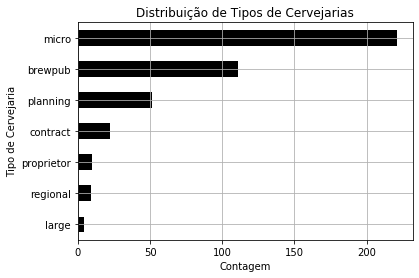

In [19]:
data.groupby('brewery_type').brewery_type.count().sort_values().plot.barh(color='k')
plt.xlabel('Contagem')
plt.ylabel('Tipo de Cervejaria')
plt.title('Distribuição de Tipos de Cervejarias')
plt.grid()

# Usando requests 

In [21]:
import requests

In [26]:
url = 'https://api.openbrewerydb.org/breweries'
obj = requests.get(url).json()
df_data = pd.DataFrame.from_dict(obj)
df_data.head()

,brewery_type,city,country,id,latitude,longitude,name,phone,postal_code,state,street,tag_list,updated_at,website_url
0,micro,Birmingham,United States,2,33.524521,-86.774322,Avondale Brewing Co,2057775456,35222-1932,Alabama,201 41st St S,[],2018-08-23T23:19:57.825Z,http://www.avondalebrewing.com
1,micro,Birmingham,United States,44,33.5128492349817,-86.7914000624146,Trim Tab Brewing,2057030536,35233-3401,Alabama,2721 5th Ave S,[],2018-08-23T23:20:31.423Z,http://www.trimtabbrewing.com
2,micro,Huntsville,United States,46,34.7277523,-86.5932014,Yellowhammer Brewery,2569755950,35805-3046,Alabama,2600 Clinton Ave W,[],2018-08-23T23:20:33.102Z,http://www.yellowhammerbrewery.com
3,micro,Wasilla,United States,55,61.5752695,-149.4127103,Bearpaw River Brewing Co,,99654-7679,Alaska,4605 E Palmer Wasilla Hwy,[],2018-08-23T23:20:40.743Z,http://bearpawriverbrewing.com
4,micro,Anchorage,United States,76,61.1384893547315,-149.879076042937,King Street Brewing Co,9073365464,99515,Alaska,9050 King Street,[],2018-08-23T23:20:57.179Z,http://www.kingstreetbrewing.com


In [27]:
df_data.shape

(20, 14)

# Per City 

In [28]:
url = 'https://api.openbrewerydb.org/breweries'

params = {
    'by_city': 'New York'
}

obj = requests.get(url, params).json()
df_data = pd.DataFrame.from_dict(obj)
df_data.head()

,brewery_type,city,country,id,latitude,longitude,name,phone,postal_code,state,street,tag_list,updated_at,website_url
0,planning,New York,United States,4704,None,None,Empire City Beer Company,9178040571,10012,New York,,[],2018-08-11T21:38:33.652Z,http://www.hitemhard.com
1,contract,New York,United States,4584,None,None,Alphabet City Brewing Co,9143566809,10009-7055,New York,96 Avenue C Frnt 4,[],2018-08-11T21:38:29.563Z,http://www.acbnyc.com
2,contract,New York,United States,4594,None,None,B9 Beverages Inc,,10018-2797,New York,404 5th Ave # 7.055,[],2018-08-11T21:38:29.854Z,
3,brewpub,New York,United States,4610,None,None,Birreria @ Eataly,2125390204,10010-3302,New York,200 5th Ave Fl 14,[],2018-08-11T21:38:30.589Z,http://www.eatalyny.com
4,planning,New York,United States,4631,None,None,Brewery in Planning - New York,,TBD,New York,,[],2018-08-11T21:38:31.263Z,
